<a href="https://colab.research.google.com/github/harisgulzar1/RoadDistressAnalysis/blob/main/Lecture1_1_DistressAnalysisTraining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Road Distress Analysis
## Lecture 1.1
Introduction to Pytorch (Machine Learning Framework) and CNNs

# Basic Python Code
The basic python code consists of following major parts.
- Documentation (Optional)
- Importing Libraries
- Global Declaration
- Defining a Class and its Functions
- Subprogram Section (Functions)
- Playground Section (Demonstration)

In [2]:
"""
Sample Python Script

This script demonstrates various components of Python:
- Documentation
- Importing Libraries
- Global Declaration
- Defining a Class and its Functions
- Subprogram Section (Functions)
- Playground Section (Demonstration)

Author: Haris Gulzar
Date: June 2024
"""

# Importing libraries
import math

# Global variable declaration
global_var = 10

# Define a class
class SampleClass:

    # dafault function in each class
    def __init__(self, name):
        self.name = name

    def greet(self):
        return f"Hello, {self.name}!"

    def square_root(self, x):
        return math.sqrt(x)

# Subprogram section (functions)
def add_numbers(a, b):
    return a + b

def multiply_numbers(a, b):
    return a * b

# Playground/Main section
if __name__ == "__main__":
    # Create an instance of SampleClass
    obj = SampleClass("Haris")

    # Demonstrate class method
    print(obj.greet())  # Output: Hello, Haris!

    # Demonstrate global variable
    print(f"Global variable: {global_var}")  # Output: Global variable: 10

    # Demonstrate functions
    print(f"Addition result: {add_numbers(5, 3)}")  # Output: Addition result: 8
    print(f"Multiplication result: {multiply_numbers(4, 6)}")  # Output: Multiplication result: 24

    # Demonstrate class method using imported math library
    print(f"Square root of 16: {obj.square_root(16)}")  # Output: Square root of 16: 4.0

Hello, Haris!
Global variable: 10
Addition result: 8
Multiplication result: 24
Square root of 16: 4.0


## Exercise ❓
Write a new function of division and use it in the main part of the code.

# Introduction to Convolutional Network (CNN)

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader, random_split

# Define the CNN architecture
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Prepare data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load MNIST dataset
mnist_train = MNIST(root='./data', train=True, download=True, transform=transform)
mnist_test = MNIST(root='./data', train=False, download=True, transform=transform)

# Split train set into train and validation set
train_size = int(0.8 * len(mnist_train))
val_size = len(mnist_train) - train_size
mnist_train, mnist_val = random_split(mnist_train, [train_size, val_size])

# Create data loaders
train_loader = DataLoader(mnist_train, batch_size=64, shuffle=True)
val_loader = DataLoader(mnist_val, batch_size=64, shuffle=False)
test_loader = DataLoader(mnist_test, batch_size=64, shuffle=False)

# Initialize the CNN model, loss function, and optimizer
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 3
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * images.size(0)

    # Validation loop
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    # Print statistics
    epoch_loss = running_loss / len(mnist_train)
    val_accuracy = correct / total * 100
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%')

print('Finished Training')

# Test the model
model.eval()
test_correct = 0
test_total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()

test_accuracy = test_correct / test_total * 100
print(f'Test Accuracy: {test_accuracy:.2f}%')


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 38098150.19it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1110735.42it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 10965838.87it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 6519688.15it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Epoch [1/10], Loss: 0.1789, Validation Accuracy: 97.71%
Epoch [2/10], Loss: 0.0476, Validation Accuracy: 98.54%
Epoch [3/10], Loss: 0.0332, Validation Accuracy: 98.66%
Epoch [4/10], Loss: 0.0241, Validation Accuracy: 98.94%
Epoch [5/10], Loss: 0.0173, Validation Accuracy: 98.88%
Epoch [6/10], Loss: 0.0128, Validation Accuracy: 98.97%
Epoch [7/10], Loss: 0.0107, Validation Accuracy: 99.02%
Epoch [8/10], Loss: 0.0110, Validation Accuracy: 98.90%
Epoch [9/10], Loss: 0.0084, Validation Accuracy: 98.72%
Epoch [10/10], Loss: 0.0078, Validation Accuracy: 99.08%
Finished Training
Test Accuracy: 99.00%


## Loading the Pretrained Model

In [9]:
# Define a path where you want to save the entire model
model_path = '/content/drive/MyDrive/AItraining2data/mnist_cnn_model.pt'

# Save the entire model (including architecture and state_dict) to the specified path
torch.save(model, model_path)

## Testing CNN with examples

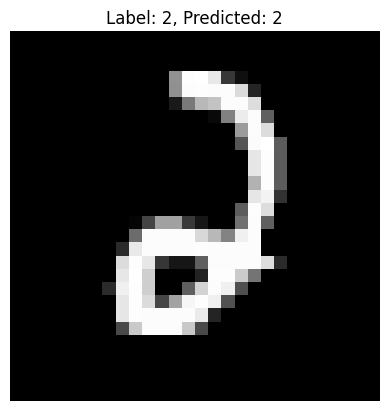

In [17]:

import torch
import matplotlib.pyplot as plt
import numpy as np
from torchvision.datasets import MNIST
import random

# Load the saved model from the .pt file
model = torch.load(model_path)

# Function to visualize and perform inference on a random MNIST sample
def visualize_and_infer(model, dataset):
    # Set model to evaluation mode
    model.eval()

    # Randomly pick a sample from the dataset
    idx = random.randint(0, len(dataset) - 1)
    image, label = dataset[idx]

    # Perform inference
    with torch.no_grad():
        # Forward pass through the model
        output = model(image.unsqueeze(0))  # Add batch dimension

        # Get predicted class
        _, predicted = torch.max(output, 1)

    # Visualize the image and prediction
    plt.imshow(image.squeeze(), cmap='gray')
    plt.title(f'Label: {label}, Predicted: {predicted.item()}')
    plt.axis('off')
    plt.show()

# Load MNIST dataset for inference
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
mnist_test = MNIST(root='./data', train=False, download=True, transform=transform)

# Call the function to visualize and infer
visualize_and_infer(model, mnist_test)

## Exercise ❓
1. Draw an image on your PC
2. Upload to the drive
3. Predict using the following code

In [19]:
import torchvision.transforms as transforms
from PIL import Image

# Function to preprocess the uploaded image
def preprocess_image(image_path):
    image = Image.open(image_path)

    # Resize image to 28x28
    transform = transforms.Compose([
        transforms.Resize((28, 28)),
        transforms.Grayscale(num_output_channels=1),  # Convert to grayscale
        transforms.ToTensor(),  # Convert to tensor
        transforms.Normalize((0.5,), (0.5,))  # Normalize
    ])

    # Apply transformations
    image_tensor = transform(image).unsqueeze(0)  # Add batch dimension
    return image_tensor

# Function to classify the uploaded image using the pre-trained model
def classify_uploaded_image(model, image_path):
    # Preprocess the image
    image_tensor = preprocess_image(image_path)

    # Set model to evaluation mode
    model.eval()

    # Perform inference
    with torch.no_grad():
        output = model(image_tensor)
        _, predicted = torch.max(output, 1)

    # Return predicted label
    return predicted.item()

# Example usage with an image from local PC
image_path = '/content/4digit.png'

# Replace with your local image path
predicted_label = classify_uploaded_image(model, image_path)

# Print the predicted label
print(f'Predicted Label: {predicted_label}')

Predicted Label: 7
